<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** 
- Christa Itzel Barrios Martinez
- Javier Alejandro Contreras Figueroa

**Fecha:** 15 de febrero del 2024.

**Expediente** : 
- 739328
- 739708
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/ChristaBarrios/Tarea_3_CIBarrios_JAContreras.git

**Link Github Fork**: https://github.com/JavierFigueroa21/Tarea_3_CIBarrios_JAContreras

# Tarea 3: Clase 7

Condensar todos los procedimientos realizados en esta clase donde se implementen los métodos necesarios para crear un correcto flujo de lectura de datos, análisis, ajuste de parámetros, predicción y métricas de errores para un conjunto de datos dado. Algo como lo siguiente:

In [ ]:
class LinearForecast:
    def __init__(self, atributos_del_contructor):
        
    def adf_test(self):
        
    def plot_acf_pac(self):


Implementar los métodos y las lógicas que consideren pertinentes, como de igual forma las posibles variables a introducir en el constructor de la clase.

Posteriormente, utilizar la clase anteriormente creada para generar un modelo SARIMAX para el siguiente conjunto de datos: https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stl.mstl import MSTL
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np



Código de solución estudiante 1

In [66]:
class LinearForecast:
    def __init__(self, datos):
        self.datos = datos

    def adf_test(self):
        """
        Realiza el Test Aumentado de Dickey-Fuller para determinar la estacionariedad de la serie.
        """
        print("Resultados del Test Aumentado de Dickey-Fuller:")
        resultado = adfuller(self.datos)
        print(f'Estadístico del Test: {resultado[0]}')
        print(f'p-valor: {resultado[1]}')
        print(f'Valores Críticos:')
        for clave, valor in resultado[4].items():
            print(f'   {clave}: {valor}')

        if resultado[1] <= 0.05:
            print("\u001b[32mLa serie es probablemente estacionaria.\u001b[0m")
        else:
            print("\x1b[31mLa serie es probablemente no estacionaria.\x1b[0m")

    def plot_acf_pacf(self, rezagos=None):
        """
        Grafica la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) de la serie de tiempo.
        """
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        plot_acf(self.datos, lags=rezagos, ax=ax1)
        plot_pacf(self.datos, lags=rezagos, ax=ax2)
        plt.show()

    def decompose(self):
        datos_copia = self.datos.copy()
        periodos_estacionalidad = (6, 12)
    
        parametros_stl = {"seasonal_deg": 0}
        modelo = MSTL(datos_copia, periods=periodos_estacionalidad, stl_kwargs=parametros_stl)
        resultado = modelo.fit()
    
        # Gráfica de descomposición
        fig, ejes = plt.subplots(5, 1, sharex=True, figsize=(8, 8))
    
        resultado.observed.plot(ax=ejes[0])
        ejes[0].set_ylabel('Observado')
    
        resultado.trend.plot(ax=ejes[1])
        ejes[1].set_ylabel('Tendencia')
    
        resultado.seasonal[f'seasonal_{periodos_estacionalidad[0]}'].plot(ax=ejes[2])
        ejes[2].set_ylabel(f'Estacional_{periodos_estacionalidad[0]}')
    
        resultado.seasonal[f'seasonal_{periodos_estacionalidad[1]}'].plot(ax=ejes[3])
        ejes[3].set_ylabel(f'Estacional_{periodos_estacionalidad[1]}')
    
        resultado.resid.plot(ax=ejes[4])
        ejes[4].set_ylabel('Residual')
    
        fig.tight_layout()
        
        return resultado



    def split_dataset(self, tamaño_prueba=0.2, estado_aleatorio=None):
        """
        Divide el conjunto de datos en conjuntos de entrenamiento y prueba.
        """
        datos_entrenamiento, datos_prueba = train_test_split(self.datos, test_size=tamaño_prueba, random_state=estado_aleatorio, shuffle=False)
        return datos_entrenamiento, datos_prueba

    def evaluate_forecasts(self, reales, pronosticados):
        """
        Evalúa los valores pronosticados con respecto a los valores reales.
        """
        mse = mean_squared_error(reales, pronosticados)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(reales, pronosticados)
        mape = mean_absolute_percentage_error(reales, pronosticados)
        
        return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

    def arima_forecast(self, p, d, q, horizonte=1):
        """
        Realiza un pronóstico utilizando un modelo ARIMA.
        """
        modelo = ARIMA(self.datos, order=(p, d, q))
        ajuste_modelo = modelo.fit()
        pronostico = ajuste_modelo.forecast(steps=horizonte)
        return pronostico

    def sarimax_forecast(self, orden, orden_estacional, horizonte=1, tendencia=None):
        """
        Realiza un pronóstico utilizando un modelo SARIMAX.
        """
        modelo = SARIMAX(self.datos, order=orden, seasonal_order=orden_estacional, trend=tendencia)
        ajuste_modelo = modelo.fit()
        pronostico = ajuste_modelo.forecast(steps=horizonte)
        return pronostico


In [5]:
data = pd.read_excel('https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true')
data.head(20)

,Unnamed: 0,date,year,month,day,hour,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh)
0,6,1990-01-01,1990,Jan,Mon,6,234,503,78,12.1406,9.7,498.6320
1,7,1990-01-01,1990,Jan,Mon,7,448,723,91,13.3250,10.1,720.4090
2,8,1990-01-01,1990,Jan,Mon,8,699,959,71,13.3094,9.3,946.1540
3,9,1990-01-01,1990,Jan,Mon,9,880,1016,73,13.9375,9.1,987.2730
4,10,1990-01-01,1990,Jan,Mon,10,1009,1031,85,14.1141,8.0,1000.2300
5,11,1990-01-01,1990,Jan,Mon,11,1081,1034,95,14.6625,8.5,991.1800
6,12,1990-01-01,1990,Jan,Mon,12,1093,1038,95,14.8500,8.2,992.9360
7,13,1990-01-01,1990,Jan,Mon,13,1040,1039,84,14.7094,9.1,992.3160
8,14,1990-01-01,1990,Jan,Mon,14,929,1028,72,14.7531,8.9,991.2440
9,15,1990-01-01,1990,Jan,Mon,15,779,1008,67,14.5688,9.5,982.6840


In [6]:
data = data[['date','Energy (kWh)']]
data = data.set_index('date').resample('M').mean()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 1990-01-31 to 2014-12-31
Freq: M
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Energy (kWh)  300 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [8]:
data.describe()

,Energy (kWh)
count,300.000000
mean,358.003342
std,82.084724
min,194.230820
25%,294.428858
50%,350.177359
75%,423.025473
max,560.337909


In [67]:
lf = LinearForecast(data)

In [10]:
lf.adf_test()

Resultados del Test Aumentado de Dickey-Fuller:
Estadístico del Test: -2.242267084960264
p-valor: 0.19126398271950007
Valores Críticos:
   1%: -3.4534232986669546
   5%: -2.8716994185534745
   10%: -2.5721833625116144
La serie es probablemente no estacionaria.


In [11]:
LinearForecast(data.diff().dropna()).adf_test()

Resultados del Test Aumentado de Dickey-Fuller:
Estadístico del Test: -11.853523395780165
p-valor: 7.115964313672464e-22
Valores Críticos:
   1%: -3.4534232986669546
   5%: -2.8716994185534745
   10%: -2.5721833625116144
La serie es probablemente estacionaria.


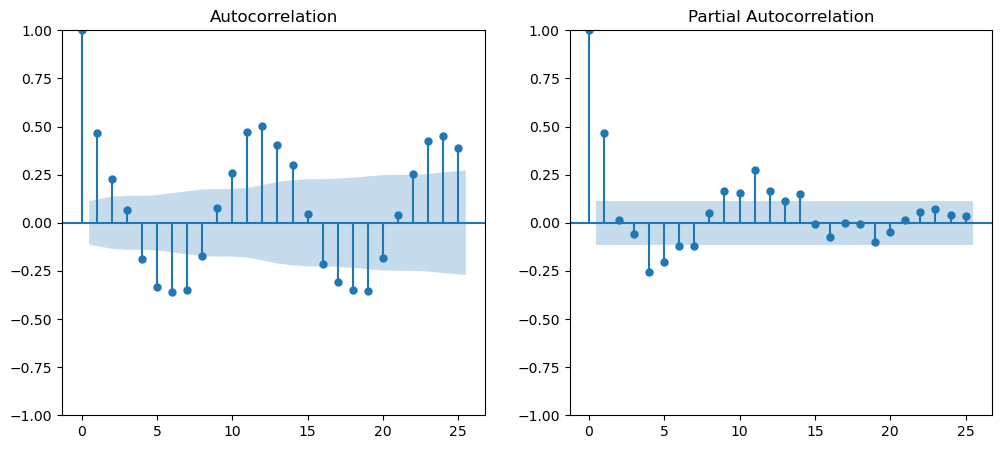

In [12]:
lf.plot_acf_pacf()

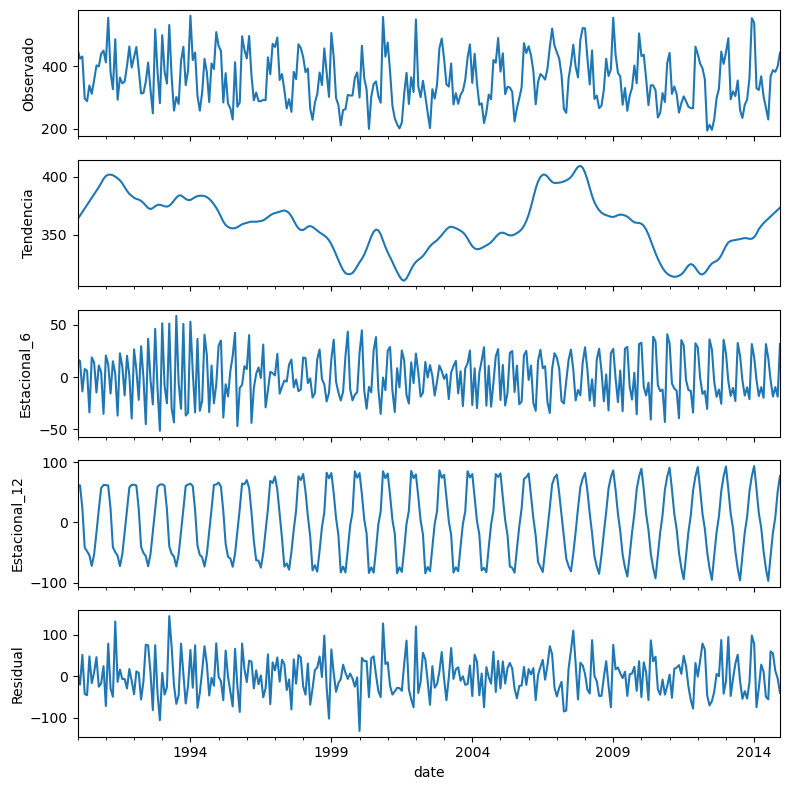

In [13]:
des = lf.decompose()

<Axes: xlabel='date'>

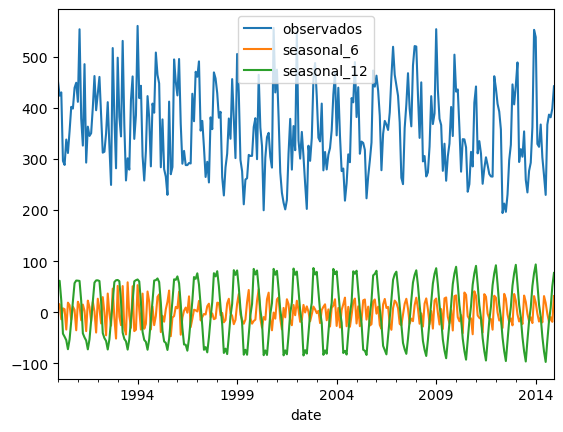

In [14]:
observ = des.observed.to_frame('observados').plot()

des.seasonal[:500].plot(ax=observ)

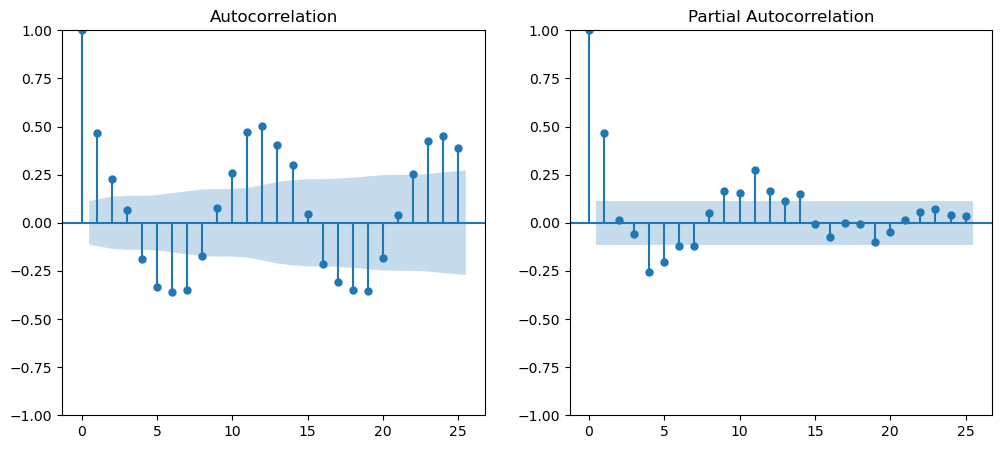

In [15]:
lf.plot_acf_pacf()

In [16]:
season_6 = des.seasonal['seasonal_6']
season_12 = des.seasonal['seasonal_12']

In [17]:
s_6 = LinearForecast(season_6)
s_12 = LinearForecast(season_12)

LinearForecast(season_6).adf_test()
LinearForecast(season_12).adf_test()

Resultados del Test Aumentado de Dickey-Fuller:
Estadístico del Test: -9.45184075188356
p-valor: 4.59407954764207e-16
Valores Críticos:
   1%: -3.453670163592738
   5%: -2.8718077069772248
   10%: -2.5722411158835796
La serie es probablemente estacionaria.
Resultados del Test Aumentado de Dickey-Fuller:
Estadístico del Test: -29.256349497755703
p-valor: 0.0
Valores Críticos:
   1%: -3.453670163592738
   5%: -2.8718077069772248
   10%: -2.5722411158835796
La serie es probablemente estacionaria.


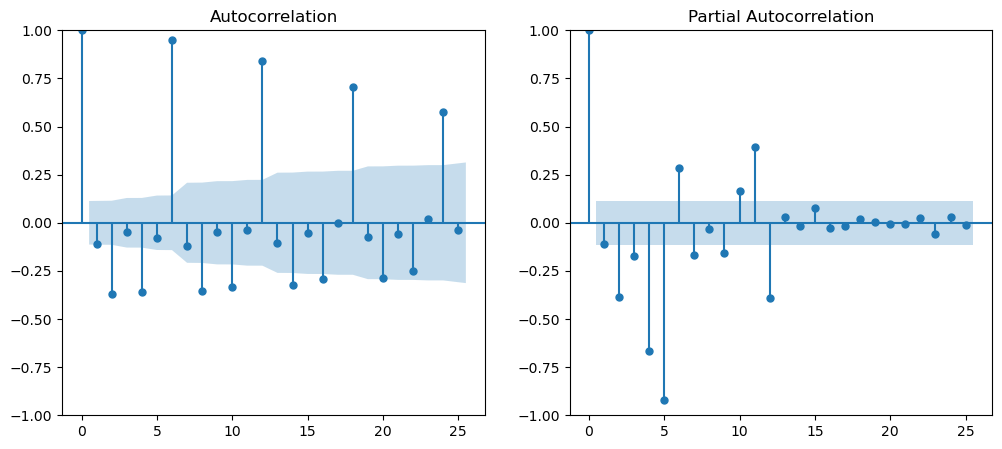

In [18]:
s_6.plot_acf_pacf()

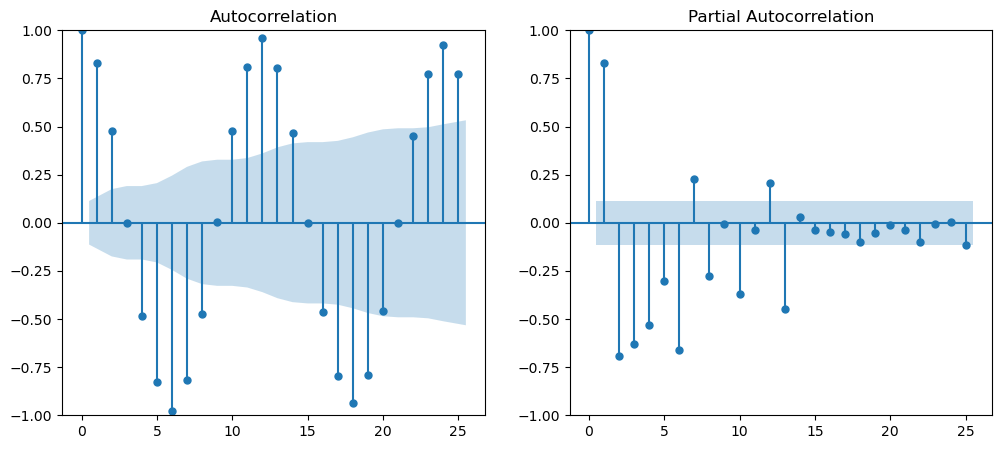

In [19]:
s_12.plot_acf_pacf()

<Axes: xlabel='date'>

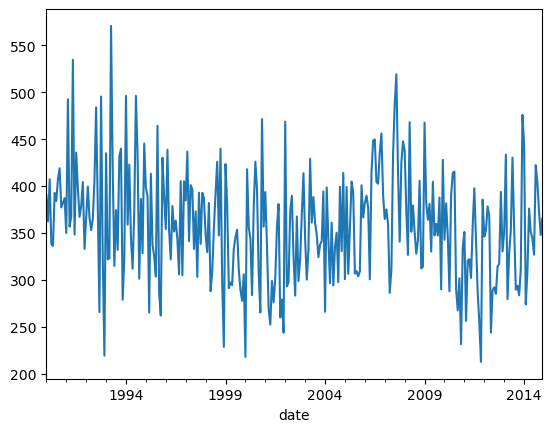

In [20]:
non_seasonal = des.observed - des.seasonal['seasonal_12']

non_seasonal.plot()

In [21]:
n_season = LinearForecast(non_seasonal)
n_season.adf_test()

Resultados del Test Aumentado de Dickey-Fuller:
Estadístico del Test: -4.543881965191807
p-valor: 0.00016369252610235545
Valores Críticos:
   1%: -3.452789844280995
   5%: -2.871421512222641
   10%: -2.5720351510944512
La serie es probablemente estacionaria.


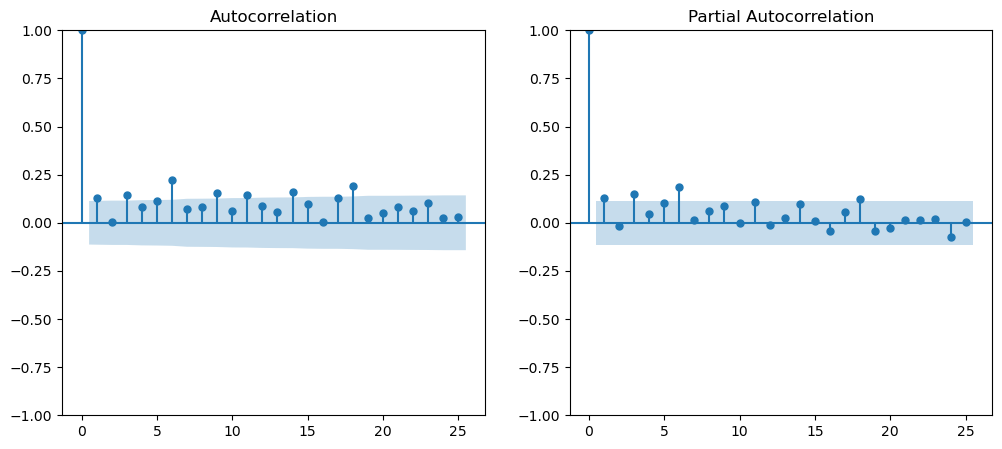

In [22]:
n_season.plot_acf_pacf()

In [32]:
p = [0, 1, 2]
d = [1]
q = [0, 1, 2]
# Parte estacional
P = [0, 1, 2]
D = [0]
Q = [0, 1, 2]
# Tipo de tendencia
t = ['n', 'c', 't', 'ct']


param_no_estacionales = list(itertools.product(p, d, q))
param_estacionales = [(x[0], x[1], x[2], 6 ) for x in list(itertools.product(P, D, Q))]
sarimax_params = list(itertools.product(param_no_estacionales, param_estacionales, t))
sarimax_params

[((0, 1, 0), (0, 0, 0, 6), 'n'),
 ((0, 1, 0), (0, 0, 0, 6), 'c'),
 ((0, 1, 0), (0, 0, 0, 6), 't'),
 ((0, 1, 0), (0, 0, 0, 6), 'ct'),
 ((0, 1, 0), (0, 0, 1, 6), 'n'),
 ((0, 1, 0), (0, 0, 1, 6), 'c'),
 ((0, 1, 0), (0, 0, 1, 6), 't'),
 ((0, 1, 0), (0, 0, 1, 6), 'ct'),
 ((0, 1, 0), (0, 0, 2, 6), 'n'),
 ((0, 1, 0), (0, 0, 2, 6), 'c'),
 ((0, 1, 0), (0, 0, 2, 6), 't'),
 ((0, 1, 0), (0, 0, 2, 6), 'ct'),
 ((0, 1, 0), (1, 0, 0, 6), 'n'),
 ((0, 1, 0), (1, 0, 0, 6), 'c'),
 ((0, 1, 0), (1, 0, 0, 6), 't'),
 ((0, 1, 0), (1, 0, 0, 6), 'ct'),
 ((0, 1, 0), (1, 0, 1, 6), 'n'),
 ((0, 1, 0), (1, 0, 1, 6), 'c'),
 ((0, 1, 0), (1, 0, 1, 6), 't'),
 ((0, 1, 0), (1, 0, 1, 6), 'ct'),
 ((0, 1, 0), (1, 0, 2, 6), 'n'),
 ((0, 1, 0), (1, 0, 2, 6), 'c'),
 ((0, 1, 0), (1, 0, 2, 6), 't'),
 ((0, 1, 0), (1, 0, 2, 6), 'ct'),
 ((0, 1, 0), (2, 0, 0, 6), 'n'),
 ((0, 1, 0), (2, 0, 0, 6), 'c'),
 ((0, 1, 0), (2, 0, 0, 6), 't'),
 ((0, 1, 0), (2, 0, 0, 6), 'ct'),
 ((0, 1, 0), (2, 0, 1, 6), 'n'),
 ((0, 1, 0), (2, 0, 1, 6), 'c'),
 ((

In [33]:
len(sarimax_params)

324

In [41]:
par_no_esta, par_esta, trend = (sarimax_params[0])
par_no_esta

(0, 1, 0)

In [79]:
data = data.drop(columns=['ln_y'])

In [84]:
train, test = LinearForecast(data).split_dataset()

In [81]:
train_log = np.log(train)

In [85]:
n = 5
res = pd.DataFrame(columns=['params', 'AIC', 'BIC', 'LLF'], index=np.arange(0, len(sarimax_params)))

i = 0
for par_no_esta, par_esta, trend in sarimax_params:
    mod = SARIMAX(
        endog=train_log,
        trend=trend,
        order=par_no_esta,
        seasonal_order=par_esta
    )
    results = mod.fit(disp=False)

    res.loc[i, 'params'] = str((par_no_esta, par_esta, trend))
    res.loc[i, 'AIC'] = results.aic
    res.loc[i, 'BIC'] = results.bic
    res.loc[i, 'LLF'] = results.llf
    i += 1

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

In [86]:
res.sort_values(by=['BIC'], ascending=True)

,params,AIC,BIC,LLF
160,"((1, 1, 1), (1, 0, 1, 6), 'n')",-151.185675,-133.803358,80.592838
268,"((2, 1, 1), (1, 0, 1, 6), 'n')",-150.384072,-129.525291,81.192036
196,"((1, 1, 2), (1, 0, 1, 6), 'n')",-149.434693,-128.575911,80.717346
68,"((0, 1, 1), (2, 0, 2, 6), 'n')",-149.212915,-128.354134,80.606457
280,"((2, 1, 1), (2, 0, 1, 6), 'n')",-148.828341,-124.493096,81.41417
...,...,...,...,...
31,"((0, 1, 0), (2, 0, 1, 6), 'ct')",-5.806042,15.05274,8.903021
34,"((0, 1, 0), (2, 0, 2, 6), 't')",-2.955843,17.902939,7.477921
23,"((0, 1, 0), (1, 0, 2, 6), 'ct')",-2.861924,17.996857,7.430962
323,"((2, 1, 2), (2, 0, 2, 6), 'ct')",-19.070852,19.170247,20.535426


In [87]:
res.sort_values(by=['AIC'], ascending=True)

,params,AIC,BIC,LLF
160,"((1, 1, 1), (1, 0, 1, 6), 'n')",-151.185675,-133.803358,80.592838
268,"((2, 1, 1), (1, 0, 1, 6), 'n')",-150.384072,-129.525291,81.192036
196,"((1, 1, 2), (1, 0, 1, 6), 'n')",-149.434693,-128.575911,80.717346
68,"((0, 1, 1), (2, 0, 2, 6), 'n')",-149.212915,-128.354134,80.606457
280,"((2, 1, 1), (2, 0, 1, 6), 'n')",-148.828341,-124.493096,81.41417
...,...,...,...,...
22,"((0, 1, 0), (1, 0, 2, 6), 't')",-4.808717,12.573601,7.404359
19,"((0, 1, 0), (1, 0, 1, 6), 'ct')",-3.248621,14.133697,6.624311
34,"((0, 1, 0), (2, 0, 2, 6), 't')",-2.955843,17.902939,7.477921
23,"((0, 1, 0), (1, 0, 2, 6), 'ct')",-2.861924,17.996857,7.430962


In [88]:
res.sort_values(by=['LLF'], ascending=True)

,params,AIC,BIC,LLF
18,"((0, 1, 0), (1, 0, 1, 6), 't')",-5.193999,8.711855,6.597
19,"((0, 1, 0), (1, 0, 1, 6), 'ct')",-3.248621,14.133697,6.624311
6,"((0, 1, 0), (0, 0, 1, 6), 't')",-7.340173,3.089218,6.670086
7,"((0, 1, 0), (0, 0, 1, 6), 'ct')",-5.395119,8.510735,6.69756
0,"((0, 1, 0), (0, 0, 0, 6), 'n')",-11.92438,-8.447917,6.96219
...,...,...,...,...
272,"((2, 1, 1), (1, 0, 2, 6), 'n')",-148.784881,-124.449636,81.392441
280,"((2, 1, 1), (2, 0, 1, 6), 'n')",-148.828341,-124.493096,81.41417
212,"((1, 1, 2), (2, 0, 2, 6), 'n')",-147.065443,-119.253734,81.532721
284,"((2, 1, 1), (2, 0, 2, 6), 'n')",-147.065819,-119.254111,81.53291


El mejor modelo es (0, 1, 0), (2, 0, 2, 6)

### Código de solución estudiante 2

In [155]:
# Código de solución estudiante 2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL, seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import statsmodels

import warnings

warnings.filterwarnings("ignore")
plt.rc("font", size=12)

In [191]:
class LinearForecast:
    def __init__(self, datos):
        self.datos = datos
            
    def adf_test(self):
        print("Results of Dickey-Fuller Test:")
        dftest = adfuller(self.datos, autolag="AIC")
        dfoutput = pd.Series(
            dftest[0:4],
            index=[
                "Test Statistic",
                "p-value",
                "#Lags Used",
                "Number of Observations Used",
            ],
        )
        for key, value in dftest[4].items():
            dfoutput["Critical Value (%s)" % key] = value
        print(dfoutput)

        if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
            print("\u001b[32mStationary\u001b[0m")
        else:
            print("\x1b[31mNon-stationary\x1b[0m")

    def plot_acf_pacf(self, **kwargs):
        """
        Grafica la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) de la serie de tiempo.
        """
        f = plt.figure(figsize=(8,5))

        ax1 = f.add_subplot(121)
        plot_acf(self.datos, zero=False, ax=ax1, **kwargs)

        ax2 = f.add_subplot(122)
        plot_pacf(self.datos, zero=False, ax=ax2, method='ols', **kwargs)

    def decompose(self, periodos_estacionalidad=(6, 12), parametros_stl={"seasonal_deg": 0}):
        datos_copia = self.datos.copy()
    
        modelo = MSTL(datos_copia, periods=periodos_estacionalidad, stl_kwargs=parametros_stl)
        resultado = modelo.fit()
    
        # Gráfica de descomposición
        fig, ejes = plt.subplots(5, 1, sharex=True, figsize=(8, 8))
    
        resultado.observed.plot(ax=ejes[0])
        ejes[0].set_ylabel('Observado')
    
        resultado.trend.plot(ax=ejes[1])
        ejes[1].set_ylabel('Tendencia')
    
        resultado.seasonal[f'seasonal_{periodos_estacionalidad[0]}'].plot(ax=ejes[2])
        ejes[2].set_ylabel(f'Estacional_{periodos_estacionalidad[0]}')
    
        resultado.seasonal[f'seasonal_{periodos_estacionalidad[1]}'].plot(ax=ejes[3])
        ejes[3].set_ylabel(f'Estacional_{periodos_estacionalidad[1]}')
    
        resultado.resid.plot(ax=ejes[4])
        ejes[4].set_ylabel('Residual')
    
        fig.tight_layout()
        
        return resultado

    def split_dataset(self, test_size=0.2, random_state=None):
        training_data, test_data = train_test_split(self.datos, test_size=test_size, random_state=random_state, shuffle=False)
        return training_data, test_data


    def sarimax_forecast(self, orden, orden_estacional, horizonte=1, tendencia=None):
        modelo = SARIMAX(self.datos, order=orden, seasonal_order=orden_estacional, trend=tendencia)
        ajuste_modelo = modelo.fit()
        pronostico = ajuste_modelo.forecast(steps=horizonte)
        return pronostico

In [157]:
# Leemos los datos 
# intalar openpyxl no es necesario importar
data = pd.read_excel('https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true')
#data.head(15)

In [158]:
df = data[['date', 'GHI (W/m2)']]
#df['date'] = pd.to_datetime(df['date']) 
df = df.set_index('date').resample('M').mean()

In [159]:
df.head()

,GHI (W/m2)
date,
1990-01-31,474.580000
1990-02-28,420.594752
1990-03-31,385.858824
1990-04-30,323.962069
1990-05-31,282.753333


<Axes: xlabel='date'>

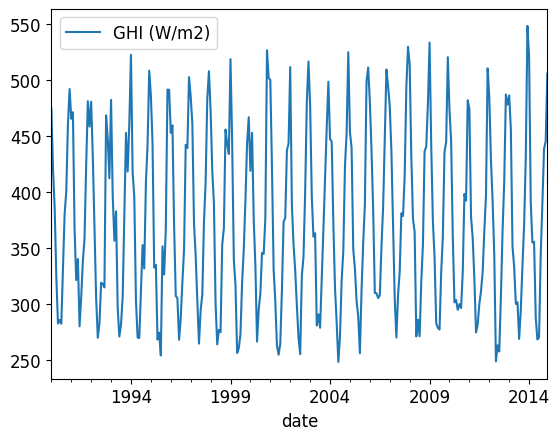

In [160]:
df[:600].plot()

- Se intento ver la serie por el año, sin embargo, no se ve muy bien, por lo que mejor la observaremos mensualmente.
    - A simple vista parece que no tiene una tendencia.
    - Parece tener cierta estacionalidad y una varianza/media constante.

In [161]:
data = df

In [162]:
SeriesA = LinearForecast(data)

In [163]:
SeriesA

In [164]:
SeriesA.adf_test()


Results of Dickey-Fuller Test:
Test Statistic                  -2.580710
p-value                          0.097050
#Lags Used                      13.000000
Number of Observations Used    286.000000
Critical Value (1%)             -3.453423
Critical Value (5%)             -2.871699
Critical Value (10%)            -2.572183
dtype: float64
Non-stationary


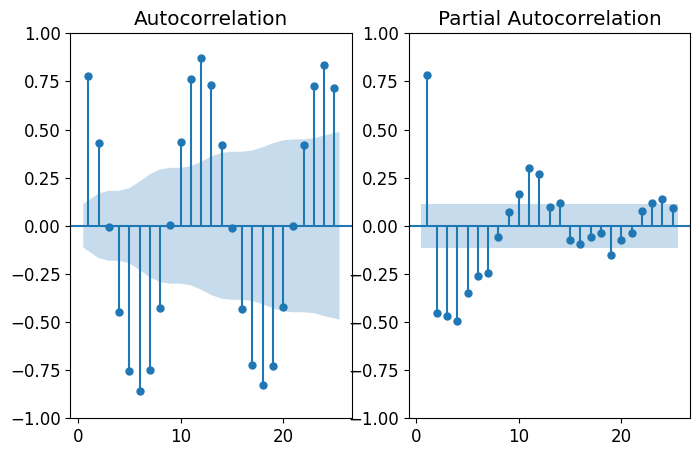

In [165]:
SeriesA.plot_acf_pacf()

- Observamos un comportamiento senoidail sin l adiferenciación, por lo que procederomos ha hacerla y determinar el p, q.

In [166]:
LinearForecast(data.diff().dropna()).adf_test()

Results of Dickey-Fuller Test:
Test Statistic                -1.204383e+01
p-value                        2.693539e-22
#Lags Used                     1.200000e+01
Number of Observations Used    2.860000e+02
Critical Value (1%)           -3.453423e+00
Critical Value (5%)           -2.871699e+00
Critical Value (10%)          -2.572183e+00
dtype: float64
Stationary


In [167]:
#data.diff().dropna()

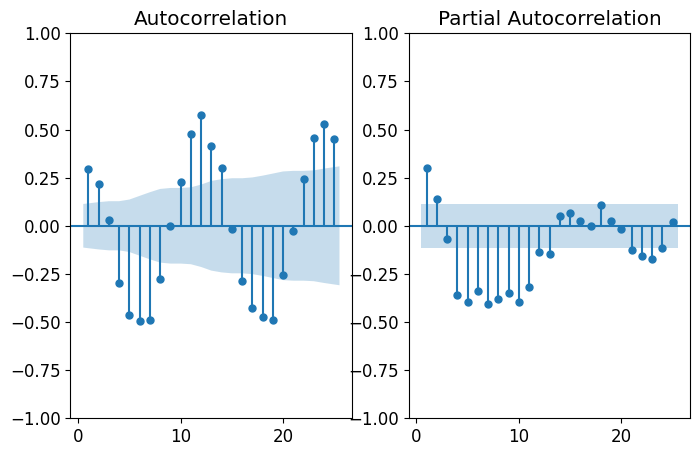

In [168]:
# Una diferenciacion
# Q lado izq, P lado der
LinearForecast(data.diff().dropna()).plot_acf_pacf()

Con una diferencia:
- (p,d,q) = (2,1,2)
- Seasonal - 6, 12
- P D Q = (1,1,1)


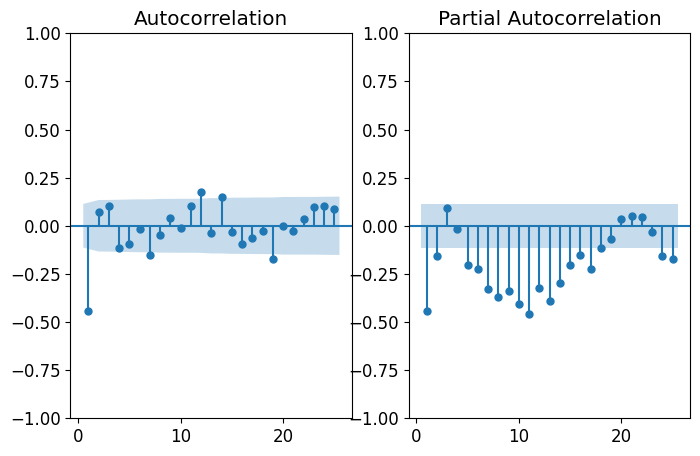

In [169]:
# 2diferenciaciones
LinearForecast(data.diff().diff().dropna()).plot_acf_pacf()

Con dos diferencias:
- (p,d,q) = (1,1,1)

### Descomposición

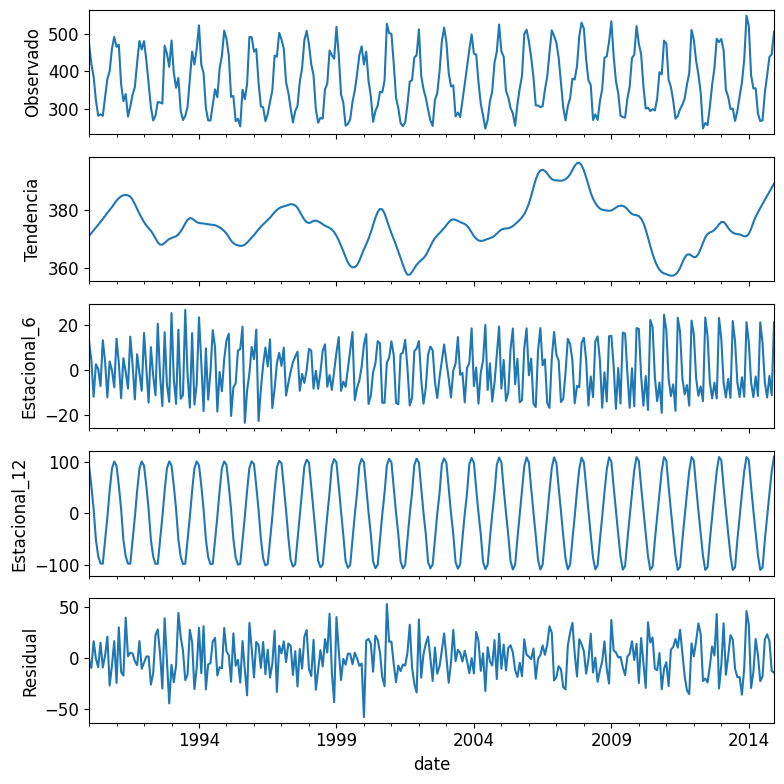

In [170]:
descomposicion = SeriesA.decompose()

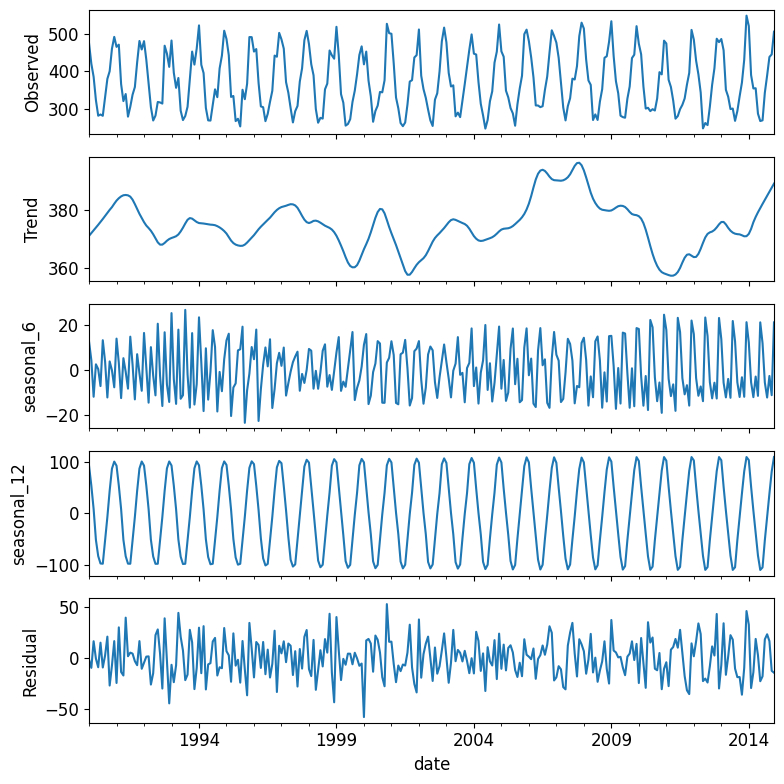

In [171]:
from statsmodels.tsa.seasonal import MSTL
import matplotlib.pyplot as plt

data1 = data[:600].copy()
periods_seasonality = (6, 12)

stl_kwargs = {"seasonal_deg": 0} 
model = MSTL(data1, periods=periods_seasonality, stl_kwargs=stl_kwargs)
res2 = model.fit()

# Gráfica de descomposición
fig, ax = plt.subplots(5, 1, sharex=True, figsize=(8, 8))

res2.observed.plot(ax=ax[0])
ax[0].set_ylabel('Observed')

res2.trend.plot(ax=ax[1])
ax[1].set_ylabel('Trend')

res2.seasonal[f'seasonal_{periods_seasonality[0]}'].plot(ax=ax[2])
ax[2].set_ylabel(f'seasonal_{periods_seasonality[0]}')

res2.seasonal[f'seasonal_{periods_seasonality[1]}'].plot(ax=ax[3])
ax[3].set_ylabel(f'seasonal_{periods_seasonality[1]}')

res2.resid.plot(ax=ax[4])
ax[4].set_ylabel('Residual')

fig.tight_layout()

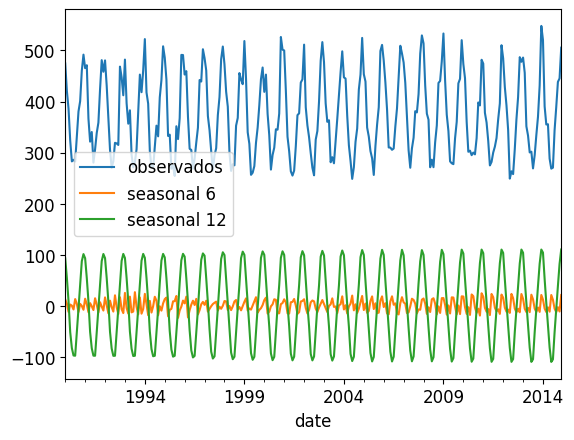

In [172]:
# Graficar datos observados con datos de estacionalidad
ax = res2.observed[:600].plot(label='observados')

res2.seasonal['seasonal_6'][:600].plot(ax=ax, label='seasonal 6')
res2.seasonal['seasonal_12'][:600].plot(ax=ax, label='seasonal 12')

plt.legend()
plt.show()

(p,d,q) = (2,1,2)
Seasonal - 6, 12
P D Q = (1,1,1)

### Estacionalidad de la estacionalidad encontrada

In [173]:
seasonality_6 = res2.seasonal['seasonal_6']
seasonality_12 = res2.seasonal['seasonal_12']

In [174]:
# Inicializamos los datos en cada una de sus estacionalidades
s6 = LinearForecast(seasonality_6)
s12 = LinearForecast(seasonality_12)

In [175]:
LinearForecast(seasonality_6).adf_test()
print(" ")
LinearForecast(seasonality_12).adf_test()

Results of Dickey-Fuller Test:
Test Statistic                -8.967560e+00
p-value                        7.913296e-15
#Lags Used                     1.600000e+01
Number of Observations Used    2.830000e+02
Critical Value (1%)           -3.453670e+00
Critical Value (5%)           -2.871808e+00
Critical Value (10%)          -2.572241e+00
dtype: float64
Stationary
 
Results of Dickey-Fuller Test:
Test Statistic                 -26.876711
p-value                          0.000000
#Lags Used                      16.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64
Stationary


- Comprobamos que ambas son estacionarias.

<Axes: xlabel='date'>

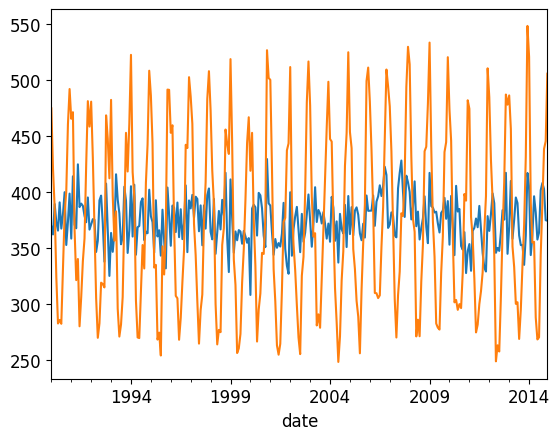

In [176]:
# Calcular la componente no estacional de la serie temporal basado en la S anterior
non_seasonal = res2.observed - res2.seasonal['seasonal_6'] - res2.seasonal['seasonal_12']

non_seasonal.plot() # la azul cmap = "gray"
res2.observed.plot()

In [177]:
# Dterminemos si la no estacional es estacionaria
LinearForecast(non_seasonal).adf_test()

Results of Dickey-Fuller Test:
Test Statistic                  -3.362199
p-value                          0.012317
#Lags Used                      13.000000
Number of Observations Used    286.000000
Critical Value (1%)             -3.453423
Critical Value (5%)             -2.871699
Critical Value (10%)            -2.572183
dtype: float64
Stationary


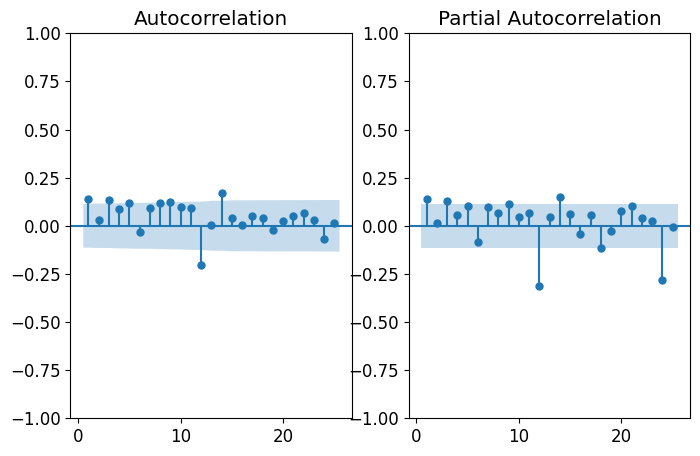

In [178]:
LinearForecast(non_seasonal).plot_acf_pacf()

In [179]:
seasonality_6.head()

date
1990-01-31    12.404665
1990-02-28     4.180315
1990-03-31   -12.101372
1990-04-30     2.331330
1990-05-31     0.208589
Freq: ME, Name: seasonal_6, dtype: float64

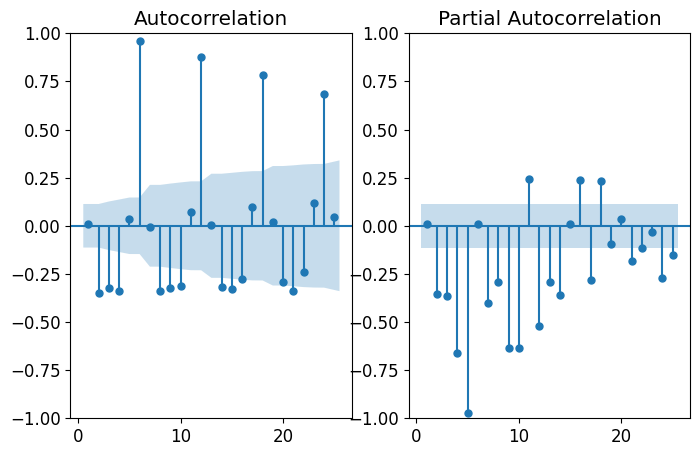

In [180]:
s6.plot_acf_pacf()

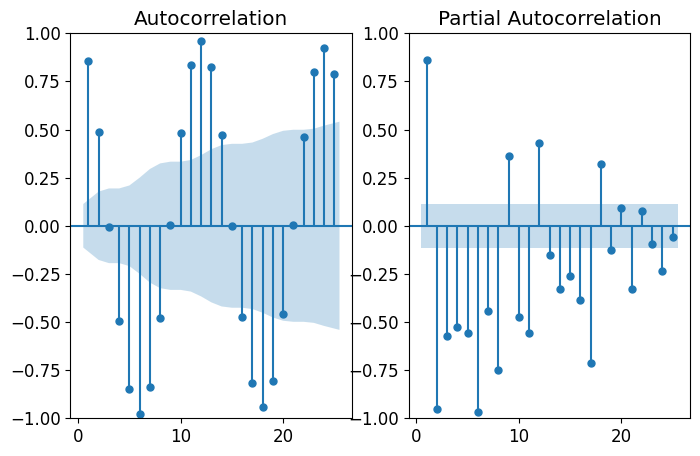

In [181]:
s12.plot_acf_pacf()

In [182]:
#list(itertools.product(P, D, Q, [6]))

(p,d,q) = (2,1,2)
Seasonal - 6, 12
P D Q = (1,1,1)

In [183]:
import itertools

# Posibles valores en lo que pueden variar los parámetros de un SARIMAX
# Parte no estacional
p = [0, 1, 2]
d = [0, 1]
q = [0, 1, 2]
# Parte estacional
P = [1, 1, 1]
D = [0, 1]
Q = [1, 1, 1]
# Tipo de tendencia
t = ['n', 'c', 't', 'ct']

# Explorar función itertools.product
no_estacional = list(itertools.product(p, d, q))
estacional = list(itertools.product(P, D, Q, [6]))

# Diferentes conmbinaciones
sarimax_params = (list(itertools.product(no_estacional, estacional, t)))

sarimax_params

[((0, 0, 0), (1, 0, 1, 6), 'n'),
 ((0, 0, 0), (1, 0, 1, 6), 'c'),
 ((0, 0, 0), (1, 0, 1, 6), 't'),
 ((0, 0, 0), (1, 0, 1, 6), 'ct'),
 ((0, 0, 0), (1, 0, 1, 6), 'n'),
 ((0, 0, 0), (1, 0, 1, 6), 'c'),
 ((0, 0, 0), (1, 0, 1, 6), 't'),
 ((0, 0, 0), (1, 0, 1, 6), 'ct'),
 ((0, 0, 0), (1, 0, 1, 6), 'n'),
 ((0, 0, 0), (1, 0, 1, 6), 'c'),
 ((0, 0, 0), (1, 0, 1, 6), 't'),
 ((0, 0, 0), (1, 0, 1, 6), 'ct'),
 ((0, 0, 0), (1, 1, 1, 6), 'n'),
 ((0, 0, 0), (1, 1, 1, 6), 'c'),
 ((0, 0, 0), (1, 1, 1, 6), 't'),
 ((0, 0, 0), (1, 1, 1, 6), 'ct'),
 ((0, 0, 0), (1, 1, 1, 6), 'n'),
 ((0, 0, 0), (1, 1, 1, 6), 'c'),
 ((0, 0, 0), (1, 1, 1, 6), 't'),
 ((0, 0, 0), (1, 1, 1, 6), 'ct'),
 ((0, 0, 0), (1, 1, 1, 6), 'n'),
 ((0, 0, 0), (1, 1, 1, 6), 'c'),
 ((0, 0, 0), (1, 1, 1, 6), 't'),
 ((0, 0, 0), (1, 1, 1, 6), 'ct'),
 ((0, 0, 0), (1, 0, 1, 6), 'n'),
 ((0, 0, 0), (1, 0, 1, 6), 'c'),
 ((0, 0, 0), (1, 0, 1, 6), 't'),
 ((0, 0, 0), (1, 0, 1, 6), 'ct'),
 ((0, 0, 0), (1, 0, 1, 6), 'n'),
 ((0, 0, 0), (1, 0, 1, 6), 'c'),
 ((

In [184]:
len(sarimax_params)

1296

array([<Axes: title={'center': 'GHI (W/m2)'}>], dtype=object)

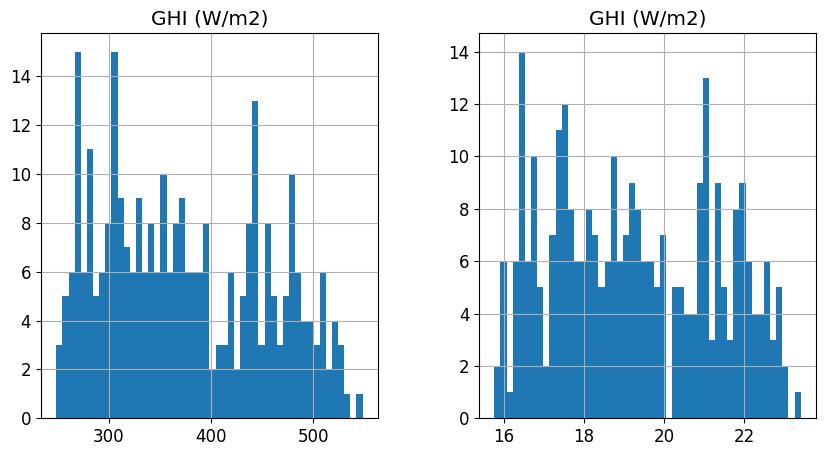

In [185]:
# Obtener histograma con la transformación logarítmica y sqrt
fig, ax = plt.subplots(1, 2, figsize=(10,5))

data.hist(bins=50, ax=ax[0])
np.sqrt(data).hist(bins=50, ax=ax[1])

In [186]:
sarimax_params[0]

((0, 0, 0), (1, 0, 1, 6), 'n')

In [187]:
data.shape

(300, 1)

Dividamos el data

In [192]:
train, test = LinearForecast(data1).split_dataset()

In [193]:
train.shape

(240, 1)

In [194]:
test.shape

(60, 1)

In [195]:
train_log = np.log(train)

In [196]:
# encuentre el 'combo más adecuado' de parámetros no estacionales y estacionales
resultados = pd.DataFrame(columns=['params', 'AIC', 'BIC', 'LLF'])

i=0
for non_seasonal, seasonal, trend in sarimax_params[200:210]:
    mod = SARIMAX(
        endog=train_log,
        trend=trend,
        order=non_seasonal,
        seasonal_order=seasonal
    )
    results = mod.fit(disp=False)
    
    resultados.loc[i, 'params'] = str((non_seasonal, seasonal, trend))
    resultados.loc[i,'AIC'] = results.aic
    resultados.loc[i,'BIC'] = results.bic
    resultados.loc[i,'LLF'] = results.llf
    i += 1

# print(f'AIC={results.aic}', f'BIC={results.bic}', f'Log-likelihood={results.llf}', sep='\n')
resultados

,params,AIC,BIC,LLF
0,"((0, 0, 2), (1, 0, 1, 6), 'n')",-217.003004,-199.599809,113.501502
1,"((0, 0, 2), (1, 0, 1, 6), 'c')",-120.704516,-99.820683,66.352258
2,"((0, 0, 2), (1, 0, 1, 6), 't')",-157.07725,-136.193417,84.538625
3,"((0, 0, 2), (1, 0, 1, 6), 'ct')",-12.322602,12.041871,13.161301
4,"((0, 0, 2), (1, 1, 1, 6), 'n')",-456.352203,-439.075597,233.176101
5,"((0, 0, 2), (1, 1, 1, 6), 'c')",-454.334609,-433.602682,233.167304
6,"((0, 0, 2), (1, 1, 1, 6), 't')",-443.322458,-422.590531,227.661229
7,"((0, 0, 2), (1, 1, 1, 6), 'ct')",-441.398995,-417.211747,227.699497
8,"((0, 0, 2), (1, 1, 1, 6), 'n')",-456.352203,-439.075597,233.176101
9,"((0, 0, 2), (1, 1, 1, 6), 'c')",-454.334609,-433.602682,233.167304


In [197]:
resultados.sort_values(by=['AIC'], ascending=True)

,params,AIC,BIC,LLF
4,"((0, 0, 2), (1, 1, 1, 6), 'n')",-456.352203,-439.075597,233.176101
8,"((0, 0, 2), (1, 1, 1, 6), 'n')",-456.352203,-439.075597,233.176101
5,"((0, 0, 2), (1, 1, 1, 6), 'c')",-454.334609,-433.602682,233.167304
9,"((0, 0, 2), (1, 1, 1, 6), 'c')",-454.334609,-433.602682,233.167304
6,"((0, 0, 2), (1, 1, 1, 6), 't')",-443.322458,-422.590531,227.661229
7,"((0, 0, 2), (1, 1, 1, 6), 'ct')",-441.398995,-417.211747,227.699497
0,"((0, 0, 2), (1, 0, 1, 6), 'n')",-217.003004,-199.599809,113.501502
2,"((0, 0, 2), (1, 0, 1, 6), 't')",-157.07725,-136.193417,84.538625
1,"((0, 0, 2), (1, 0, 1, 6), 'c')",-120.704516,-99.820683,66.352258
3,"((0, 0, 2), (1, 0, 1, 6), 'ct')",-12.322602,12.041871,13.161301


In [198]:
resultados.sort_values(by=['BIC'], ascending=True)


,params,AIC,BIC,LLF
4,"((0, 0, 2), (1, 1, 1, 6), 'n')",-456.352203,-439.075597,233.176101
8,"((0, 0, 2), (1, 1, 1, 6), 'n')",-456.352203,-439.075597,233.176101
5,"((0, 0, 2), (1, 1, 1, 6), 'c')",-454.334609,-433.602682,233.167304
9,"((0, 0, 2), (1, 1, 1, 6), 'c')",-454.334609,-433.602682,233.167304
6,"((0, 0, 2), (1, 1, 1, 6), 't')",-443.322458,-422.590531,227.661229
7,"((0, 0, 2), (1, 1, 1, 6), 'ct')",-441.398995,-417.211747,227.699497
0,"((0, 0, 2), (1, 0, 1, 6), 'n')",-217.003004,-199.599809,113.501502
2,"((0, 0, 2), (1, 0, 1, 6), 't')",-157.07725,-136.193417,84.538625
1,"((0, 0, 2), (1, 0, 1, 6), 'c')",-120.704516,-99.820683,66.352258
3,"((0, 0, 2), (1, 0, 1, 6), 'ct')",-12.322602,12.041871,13.161301


In [199]:
resultados.sort_values(by=['LLF'], ascending=True)


,params,AIC,BIC,LLF
3,"((0, 0, 2), (1, 0, 1, 6), 'ct')",-12.322602,12.041871,13.161301
1,"((0, 0, 2), (1, 0, 1, 6), 'c')",-120.704516,-99.820683,66.352258
2,"((0, 0, 2), (1, 0, 1, 6), 't')",-157.07725,-136.193417,84.538625
0,"((0, 0, 2), (1, 0, 1, 6), 'n')",-217.003004,-199.599809,113.501502
6,"((0, 0, 2), (1, 1, 1, 6), 't')",-443.322458,-422.590531,227.661229
7,"((0, 0, 2), (1, 1, 1, 6), 'ct')",-441.398995,-417.211747,227.699497
5,"((0, 0, 2), (1, 1, 1, 6), 'c')",-454.334609,-433.602682,233.167304
9,"((0, 0, 2), (1, 1, 1, 6), 'c')",-454.334609,-433.602682,233.167304
4,"((0, 0, 2), (1, 1, 1, 6), 'n')",-456.352203,-439.075597,233.176101
8,"((0, 0, 2), (1, 1, 1, 6), 'n')",-456.352203,-439.075597,233.176101


Respecto con el AIC Y BIC los parámetros que mejor se adaptan al modelo son:
**$$((0, 0, 2), (1, 1, 1, 6), 'n')$$**
y a su vez con el LLF:
**$$ ((0, 0, 2), (1, 0, 1, 6), 'ct')$$**

In [200]:
# Luego de encontrar el combo más óptimo ajustar de nuevo el modelo y adicionalmente poner el parámetro 
# de entrada enforce_stationary=True y enforce_invertibility=True (valor por defecto) a False.
# Finalmente llamar el método plot_diagnostics() para analizar la distribución de los residuos

In [201]:
mod = SARIMAX(
    endog=train_log,
    trend='n',
    order=(0,0,2),
    seasonal_order=(1, 1, 1, 6)
)
results = mod.fit(disp=False)

print(f'AIC={results.aic}', f'BIC={results.bic}', f'Log-likelihood={results.llf}', sep='\n')

AIC=-456.3522029431034
BIC=-439.0755973663149
Log-likelihood=233.1761014715517


In [202]:
# Explorar el método predict
results.predict(train_log.shape[0], train_log.shape[0])

2010-01-31    6.17327
Freq: ME, dtype: float64

In [203]:
# Explorar el método get_forecast y su método conf_int() y atributo predicted_mean
forecast = results.get_forecast()

forecast.conf_int(), forecast.predicted_mean

(            lower GHI (W/m2)  upper GHI (W/m2)
 2010-01-31          6.008701          6.337838,
 2010-01-31    6.17327
 Freq: ME, dtype: float64)

In [ ]:
#       """
#        Realiza un pronóstico utilizando un modelo SARIMAX.
#        """
#        modelo = SARIMAX(self.datos, order=orden, seasonal_order=orden_estacional, trend=tendencia)
#        ajuste_modelo = modelo.fit()
#        pronostico = ajuste_modelo.forecast(steps=horizonte)
#        return pronostico

In [204]:
new = LinearForecast(train_log)

In [205]:
pronostico = new.sarimax_forecast((0,0,2),(1,1,1,6))
pronostico

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69797D-02    |proj g|=  2.26847D+00


 This problem is unconstrained.



At iterate    5    f= -9.47003D-01    |proj g|=  6.72635D-01

At iterate   10    f= -9.49004D-01    |proj g|=  2.76155D-01

At iterate   15    f= -9.51631D-01    |proj g|=  3.50390D-01

At iterate   20    f= -9.52459D-01    |proj g|=  2.15885D-03

At iterate   25    f= -9.52472D-01    |proj g|=  3.46295D-02

At iterate   30    f= -9.54200D-01    |proj g|=  3.46197D-01

At iterate   35    f= -9.66151D-01    |proj g|=  1.67615D-01

At iterate   40    f= -9.71033D-01    |proj g|=  1.13093D-01

At iterate   45    f= -9.71567D-01    |proj g|=  3.02291D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     68   

2010-01-31    6.17327
Freq: ME, dtype: float64